In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid_deaths_daily_updates.csv
/kaggle/input/covid_confirmed_daily_updates.csv
/kaggle/input/covid_recovered_daily_updates.csv


In [3]:
import pandas as pd 
from pandas import datetime

cases_df = pd.read_csv('../input/covid_confirmed_daily_updates.csv', index_col = 0)
cases_dfT = cases_df.T

In [5]:
#pandas series containing dates and India's stats respectively
dates_series = pd.Series(cases_dfT.index)#to access dates only
India_series = cases_df.loc['India']#India's data with date column as index value

In [7]:
India_df = India_series.to_frame()#Since the series had index column as dates, we simply converted the series to dataframe
#India_df.India[2]#this is an way of accessing a particular index's value from a specific column
India_df.shape

(56, 1)

In [8]:
India_df_diff = India_df.diff(periods = 1)

In [9]:
India_df_diff = India_df_diff[1:]
India_df_diff.head()

,India
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
1/27/20,0.0


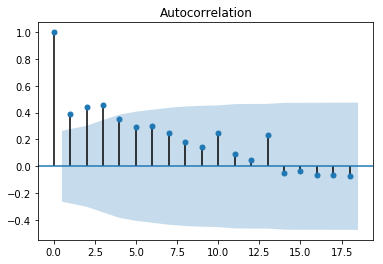

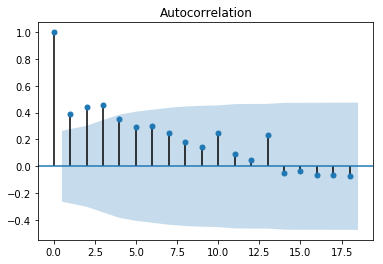

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(India_df)#It's visible that our auto_correlation plot is gradually falling, indicating that our data is not stationary.
plot_acf(India_df_diff)

In [63]:
#trying to bring stationarity using shifting an log methods
India_df_log = np.log(India_df['India'])
India_df_log.dropna().plot()
India_df_shifted = India_df_log - India_df_log.shift(1)
India_df_shifted = India_df_shifted.to_frame()
India_df_shifted.plot()

TypeError: no numeric data to plot

In [65]:
#Log and the shifted
India_df_shifted = India_df_shifted.dropna()
India_df_shifted.shape

(25, 1)

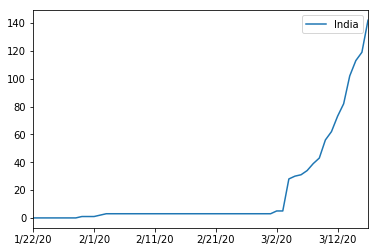

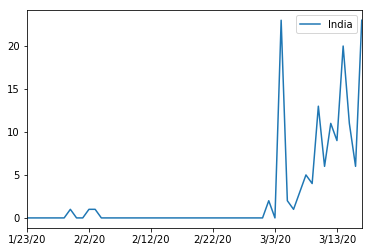

In [11]:
#this part was output of only shifting without taking logarithmic transformations
India_df.plot()
India_df_diff.plot()

In [62]:
#India_df = India_df_shifted.iloc[30:]#No need to reduce the data size since dropping the na we removed the initial part of dataset


,India


In [66]:
India_df_shifted.shape

(25, 1)

In [67]:
X = India_df_shifted.values
train = X[0:20]#70% data for training
test = X[20:]#30% for testing
predictions = []

In [68]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [70]:
predictions = model_ar_fit.predict(start = 20,end = 26)

In [71]:
test

array([[0.11625981],
       [0.21825357],
       [0.10241501],
       [0.05173567],
       [0.17670356]])

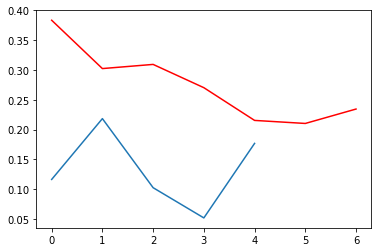

In [72]:
import matplotlib.pyplot as plt
plt.plot(test)
plt.plot(predictions, color = 'red')

In [76]:
#ARIMA MODEL
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(train,order=(0,2,1))
model_arima_fit = model_arima.fit()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [74]:
predictions = model_arima_fit.forecast(steps=6)[0]

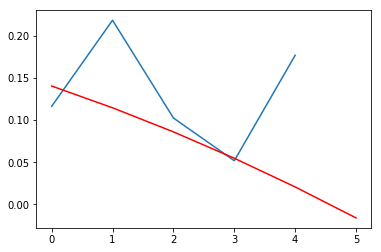

In [75]:
plt.plot(test)
plt.plot(predictions,color='red')

In [31]:
import itertools
p=d=q=range(0,9)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0, 8, 3),
 (0, 8, 4),
 (0, 8, 5),
 (0, 8, 6),
 (0, 8, 7),
 (0, 8, 8),
 (1, 0, 0),
 (1, 0, 1),
 (1,

In [32]:
import warnings
warnings.filterwarnings('ignore')
param = pdq
smallest = []
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
        smallest.append(model_arima_fit.aic)
    except:
        continue
print(smallest.index(min(smallest)))

(0, 0, 0) 179.8290302940801
(0, 0, 1) 164.71501134725193
(0, 0, 2) 154.85835866506574
(0, 0, 3) 153.17722758486912
(0, 0, 4) 148.5377248684537
(0, 0, 5) 150.52375900873284
(0, 0, 6) 152.0163961565496
(0, 0, 7) 151.5492347264223
(0, 0, 8) 153.03888533049275
(0, 1, 0) 123.82448533492764
(0, 1, 1) 125.74647841332316
(0, 1, 2) 127.67022100890463
(0, 1, 3) 129.6552632538558
(0, 1, 4) 131.65502377184285
(0, 1, 5) 133.5763380025753
(0, 1, 6) 133.0906487585374
(0, 1, 7) 134.77464983549763
(0, 1, 8) 136.4865852589022
(0, 2, 0) 129.37020612617988
(0, 2, 1) 118.56713829962962
(0, 2, 2) 119.96832080888933
(0, 2, 3) 120.20967780633103
(0, 2, 4) 121.76907769093009
(0, 2, 5) 123.7689183038917
(1, 0, 0) 140.0884577883263
(1, 0, 6) 146.16986257256494
(1, 1, 0) 125.73709889386907
(1, 1, 1) 127.60168421180913
(1, 1, 2) 164.37575908934483
(1, 1, 5) 135.03997380159538
(1, 1, 6) 134.80403693536545
(1, 1, 7) 137.22520872156088
(1, 2, 0) 125.47279659050321
(1, 2, 1) 120.13394956810312
(1, 2, 2) 122.1214778292

In [38]:
print(pdq[19])

(0, 2, 1)
